In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape(60000,28,28,1) / 255
test_images = test_images.reshape(-1,28,28,1) / 255

train_images.shape

(60000, 28, 28, 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, (3,3), activation = 'relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation= "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 16)                43280     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 43490 (169.88 KB)
Trainable params: 43490 (169.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving screenshot.png to screenshot.png


In [ ]:
from keras.preprocessing import image
import numpy as np
import cv2

color_image = cv2.imread('/content/screenshot.png')
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))
img = image.img_to_array(resized_image)
img = np.expand_dims(img, axis=0)
img = img / 255

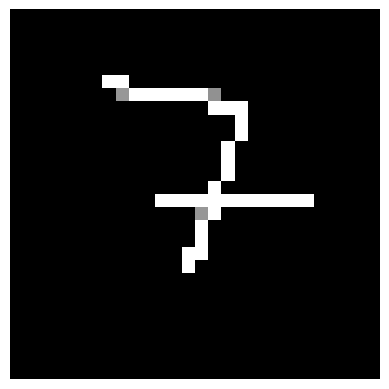

In [ ]:
import matplotlib.pyplot as plt

# Đoạn mã trước để có img đã được tiền xử lý
# img = ...

# Hiển thị ảnh
plt.imshow(img[0], cmap='gray')  # cmap='gray' để hiển thị ảnh xám
plt.axis('off')  # Ẩn trục x và y
plt.show()


In [ ]:
img.shape

(1, 28, 28, 1)

In [ ]:
predictions = model.predict(img)
predicted_class = np.argmax(predictions, axis=1)
print("Lớp dự đoán:", predicted_class[0])

1/1 [==============================] - 0s 22ms/step
Lớp dự đoán: 7


In [ ]:
model.save('CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
